# Sympy structure2d DEMO

### Existing ```beam``` module example:

Trivial example showcasing the current state of the sympy continuum mechanics capabilities.

Reaction loads: {R_0: -5, R_4: -5}


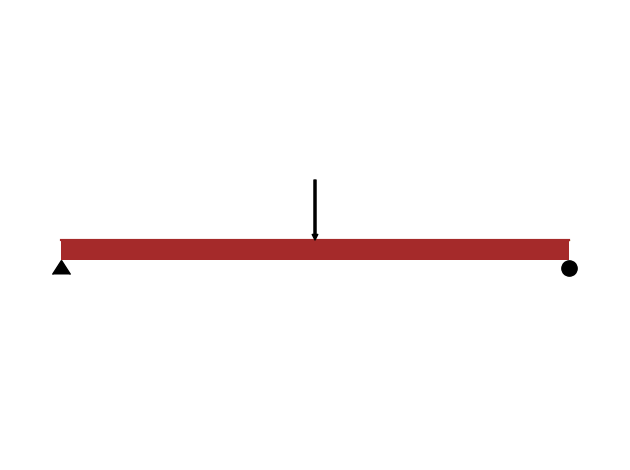

In [1]:
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols

E = 3e4
I = 1
A = 1e4

# Works for symbolic values and numerical values
F = symbols("F")
F = 10

b = Beam(4, E, I)
b.apply_load(F, 2, -1)

r1 = b.apply_support(0, "pin")
r2 = b.apply_support(4, "roller")

b.solve_for_reaction_loads(r1, r2)

print(f"Reaction loads: {b.reaction_loads}")

b.draw().show()

### ```Structure2d```

Same trivial example but using ```structure2d```:

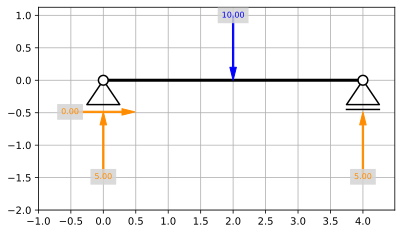

===================== Structure Summary =====================

Reaction Loads:
R_v   [0.00,0.00]  (0.00)                = -5
R_v   [4.00,0.00]  (4.00)                = -5
R_h   [0.00,0.00]  (0.00)                = 0

Points of Interest - Bending Moment:
bending_moment at [x.xx,y.yy]  (0.00)    = 0
bending_moment at [x.xx,y.yy]  (4.00)    = 0

Points of Interest - Shear Force:
shear_force at [x.xx,y.yy]  (0.00+)      = 5
shear_force at [x.xx,y.yy]  (2.00-)      = -5
shear_force at [x.xx,y.yy]  (2.00+)      = -5
shear_force at [x.xx,y.yy]  (4.00-)      = 0


In [2]:
from sympy.physics.continuum_mechanics.structure2d import Structure2d
from sympy import symbols
import sympy as sp

%config InlineBackend.figure_format = 'svg'

s = Structure2d()

E = 3e4
I = 1
A = 1e4

# Works for symbolic values and numerical values
F = symbols("F")
F = 10

s = Structure2d()
s.add_member(0, 0, 4, 0, E, I, A)

s.apply_load(2, 0, F, global_angle=270, order=-1)

Rv1, Rh1 = s.apply_support(x=0, y=0, type="pin")
Rv2 = s.apply_support(x=4, y=0, type="roller")

# solve the beam
s.solve_for_reaction_loads(Rh1, Rv1, Rv2)

s.draw(show_load_values=True)

s.summary()

# s.plot_shear_force()
# s.plot_bending_moment()

Another example using a distributed load

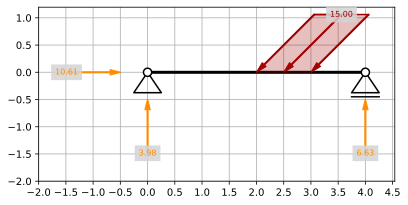

===================== Structure Summary =====================

Reaction Loads:
R_v   [0.00,0.00]  (0.00)                = -45*sqrt(2)/16
R_v   [4.00,0.00]  (4.00)                = -75*sqrt(2)/16
R_h   [0.00,0.00]  (0.00)                = 15*sqrt(2)/2

Points of Interest - Bending Moment:
bending_moment at [x.xx,y.yy]  (0.00)    = 0
bending_moment at [x.xx,y.yy]  (4.00)    = 0

Points of Interest - Shear Force:
shear_force at [x.xx,y.yy]  (0.00+)      = 45*sqrt(2)/16
shear_force at [x.xx,y.yy]  (2.00-)      = 45*sqrt(2)/16
shear_force at [x.xx,y.yy]  (2.00+)      = 45*sqrt(2)/16
shear_force at [x.xx,y.yy]  (3.00-)      = -75*sqrt(2)/16
shear_force at [x.xx,y.yy]  (3.00+)      = -75*sqrt(2)/16
shear_force at [x.xx,y.yy]  (4.00-)      = 0


In [3]:
from sympy.physics.continuum_mechanics.structure2d import Structure2d
from sympy import symbols

%config InlineBackend.figure_format = 'svg'

E = 3e4
I = 1
A = 1e4
F = symbols("F")
F = 15

s = Structure2d()
s.add_member(0, 0, 4, 0, E, I, A)

s.apply_load(2, 0, F, global_angle=225, order=0, end_x=3, end_y=0)

Rv1, Rh1 = s.apply_support(x=0, y=0, type="pin")
Rv2 = s.apply_support(x=4, y=0, type="roller")

# solve the beam
s.solve_for_reaction_loads(Rh1, Rv1, Rv2)

s.draw(show_load_values=True)

s.summary(round_digits=None)

# s.plot_shear_force()
# s.plot_bending_moment()

### More complex structure that has bend points and mulpiple loads

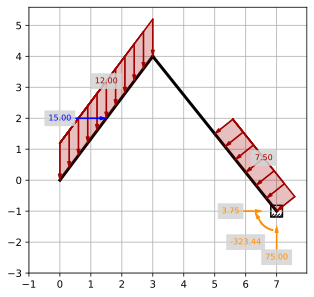

===================== Structure Summary =====================

Reaction Loads:
R_v   [7.00,-1.00]  (11.40)              = -75
R_h   [7.00,-1.00]  (11.40)              = 15/4
T     [7.00,-1.00]  (11.40)              = -8086/25

Points of Interest - Bending Moment:
bending_moment at [x.xx,y.yy]  (0.00)    = 0.0
bending_moment at [x.xx,y.yy]  (5.00)    = -120.0
bending_moment at [x.xx,y.yy]  (11.40)   = -323.44

Points of Interest - Shear Force:
shear_force at [x.xx,y.yy]  (0.00+)      = -0.0
shear_force at [x.xx,y.yy]  (2.50-)      = -30.0
shear_force at [x.xx,y.yy]  (2.50+)      = -30.0
shear_force at [x.xx,y.yy]  (5.00-)      = -25.77
shear_force at [x.xx,y.yy]  (5.00+)      = -25.77
shear_force at [x.xx,y.yy]  (8.20-)      = -25.77
shear_force at [x.xx,y.yy]  (8.20+)      = -25.77
shear_force at [x.xx,y.yy]  (11.40-)     = -49.78


In [4]:
from sympy.physics.continuum_mechanics.structure2d import Structure2d
from sympy import symbols
import sympy as sp

%config InlineBackend.figure_format = 'svg'

E = 3e4
I = 1
A = 1e4
F = symbols("F")
F = 15

s = Structure2d()
s.add_member(0, 0, 3, 4, E, I, A)
s.add_member(3, 4, 7, -1, E, I, A)

s.apply_load(start_x=1.5, start_y=2, value=F, global_angle=0, order=-1)

s.apply_load(
    5, 1.5, F / 2, global_angle=s.members[1].angle_deg + 270, order=0, end_x=7, end_y=-1
)
s.apply_load(0, 0, F * 0.8, global_angle=270, order=0, end_x=3, end_y=4)

Rh1, Rv1, T1 = s.apply_support(x=7, y=-1, type="fixed")

# solve the beam
s.solve_for_reaction_loads(Rh1, Rv1, T1)
s.draw(show_load_values=True)
# sf = s.shear_force()
# sf = sf.rewrite(sp.Piecewise)

# print(sf)
s.summary(round_digits=2)

# s.plot_shear_force()
# s.plot_bending_moment()

### same structure as above but has different supports

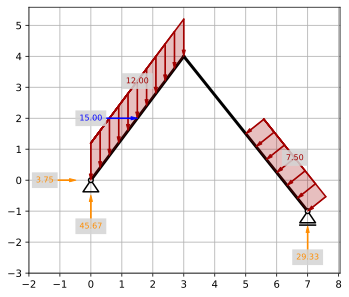

In [5]:
from sympy.physics.continuum_mechanics.structure2d import Structure2d
from sympy import symbols

%config InlineBackend.figure_format = 'svg'

E = 3e4
I = 1
A = 1e4
F = symbols("F")
F = 15

s = Structure2d()
s.add_member(0, 0, 3, 4, E, I, A)
s.add_member(3, 4, 7, -1, E, I, A)

s.apply_load(start_x=1.5, start_y=2, value=F, global_angle=0, order=-1)

s.apply_load(
    5, 1.5, F / 2, global_angle=s.members[1].angle_deg + 270, order=0, end_x=7, end_y=-1
)
s.apply_load(0, 0, F * 0.8, global_angle=270, order=0, end_x=3, end_y=4)

Rv1 = s.apply_support(x=7, y=-1, type="roller")
Rv2, Rh2 = s.apply_support(x=0, y=0, type="pin")

# solve the beam
s.solve_for_reaction_loads(Rv1, Rv2, Rh2)

s.draw(show_load_values=True)

# s.summary(round_digits=2)

# s.plot_shear_force()
# s.plot_bending_moment()

### example with vertical beams (bugged)

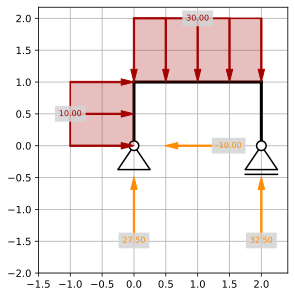

In [6]:
from sympy.physics.continuum_mechanics.structure2d import Structure2d

%config InlineBackend.figure_format = 'svg'

s = Structure2d()

E = 3e4
I = 1
A = 1e4

# this is a workaround to avoid some bug in the code that somethimes
# when vertical members are added the support reactions are not solved properly
# however the calculations work but the support reactions and the plot break
# if you dont want a graph you can still use the code without this workaround
dx = 1e-6

s = Structure2d()
s.add_member(0, 0, 0, 1, E, I, A)
s.add_member(0, 1, 2, 1, E, I, A)
s.add_member(2, 1, 2 + dx, 0, E, I, A)

s.apply_load(0, 1, 30, 270, order=0, end_x=2, end_y=1)
s.apply_load(0, 0, 10, 0, order=0, end_x=0, end_y=1)

Rv1 = s.apply_support(x=2 + dx, y=0, type="roller")
Rv2, Rh2 = s.apply_support(x=0, y=0, type="pin")

# solve the beam
s.solve_for_reaction_loads(Rv1, Rh2, Rv2)

s.draw(show_load_values=True, forced_load_size=1)

# s.summary(round_digits=2)

# s.plot_shear_force()
# s.plot_bending_moment()